En este cuadernillo se busca principalmente evaluar la calidad de los datos tomados para la interventoria 2024-I


In [2]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import re


In [3]:
df = pd.read_csv('Resultados_PAE.csv')
df_BO = pd.read_csv('Reporte BO.csv')
df_IE = pd.read_csv('Reporte IE.csv')
df

,Código,N° Visita,N° Visita Total,Fecha Planeada Inicio,Fecha Actualización,Municipio,Nombre IED,Nombre Sede,Item,Instrumento,Pregunta,Respuesta,Observación,Actualizado Por,Estado,Obligación Contractual
0,OR-A-0610,1.0,NaN,10/06/23,10/08/23,NaN,NaN,PARQUE INDUSTRIAL CALAVERIA KM.7,10,Organoléptico - Deprec,Identifique la causal del caso de atención pri...,No se presentaron CAP,NaN,ANACHELLISB,Instrumento cargado,NaN
1,OR-024-0810,3.0,NaN,10/08/23,09/09/23,JUAN DE ACOSTA,INSTITUCION EDUCATIVA FERMIN TILANO,INSTITUCION EDUCATIVA FERMIN TILANO,10,Organoléptico - Deprec,Identifique la causal del caso de atención pri...,No se presentaron CAP,Al llegar a la Institución educativa 8:00 am y...,RAMIREZLOPEZWILVER,Instrumento cargado,NaN
2,OR-032-0810,1.0,NaN,10/08/23,28/09/23,LURUACO,INSTITUCION EDUCATIVA TECNICA AGROPECUARIA NUE...,I.E.B. N 11 SOCAVON,10,Organoléptico - RI,Identifique la causal del caso de atención pri...,No se presentaron CAP,NaN,RAMIREZLOPEZWILVER,Instrumento cargado,NaN
3,OR-046-0810,2.0,NaN,10/08/23,31/08/23,PONEDERA,INSTITUCION EDUCATIVA TECNICA AGROPECUARIA LA ...,GABRIEL GARCIA MARQUEZ,10,Organoléptico - Deprec,Identifique la causal del caso de atención pri...,No se presentaron CAP,NaN,RAMIREZLOPEZWILVER,Instrumento cargado,NaN
4,OR-049-0620,2.0,NaN,20/06/23,17/07/23,PONEDERA,INSTITUCION EDUCATIVA TECNICA AGROPECUARIA DE ...,I.E. TECNICA AGROPECUARIA DE PUERTO GIRALDO - ...,10,Organoléptico - Deprec,Identifique la causal del caso de atención pri...,No se presentaron CAP,NaN,KSOSA,Instrumento cargado,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110781,IE-169-240607,1.0,1.0,07/06/24,11/06/24,Suan,I.E. ADOLFO LEÓN BOLIVAR MARENCO DE SUAN,ANTONIO NARIÑO,710,Institución - RI,"Estación de desinfección de manos y pies, para...",No observado/No aplica,No aplica,SMILENA,Diligenciado,NaN
110782,IE-169-240607,1.0,1.0,07/06/24,11/06/24,Suan,I.E. ADOLFO LEÓN BOLIVAR MARENCO DE SUAN,ANTONIO NARIÑO,720,Institución - RI,Se realiza control de temperatura previo al in...,No observado/No aplica,No aplica,SMILENA,Diligenciado,NaN
110783,IE-169-240607,1.0,1.0,07/06/24,11/06/24,Suan,I.E. ADOLFO LEÓN BOLIVAR MARENCO DE SUAN,ANTONIO NARIÑO,730,Institución - RI,En la IE se promueve el buen uso y manejo del ...,No observado/No aplica,No aplica,SMILENA,Diligenciado,NaN
110784,IE-169-240607,1.0,1.0,07/06/24,11/06/24,Suan,I.E. ADOLFO LEÓN BOLIVAR MARENCO DE SUAN,ANTONIO NARIÑO,740,Institución - RI,El operador facilita el suministro de informac...,Cumple,NaN,SMILENA,Diligenciado,NaN


In [4]:
df_BO

,Código,Instrumento,Municipio,Institución,Auditor,Dirección,N° Visita,Fecha Planeada Inicio,Promedio Total,1 P,...,Promedio Categoría A,Promedio Categoría B,Promedio Categoría C,Promedio Categoría D Limpieza y Desinfección,Promedio Categoría E,Promedio Categoría F Abastecimiento Agua,Promedio Categoría G,Promedio Categoría H,Promedio Categoría I,Promedio Categoría J
0,BO-A-0413,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,1,13/04/23,0.75,3,...,1.00,1,0.94,0.67,0.5,1,0,0.59,1.00,1.00
1,BO-A-0415,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,2,15/04/23,0.85,0,...,0.63,1,1.00,0.67,1.0,1,1,0.78,1.00,0.78
2,BO-A-0421,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,3,21/04/23,0.81,0,...,0.63,1,1.00,0.67,1.0,1,1,0.69,1.00,0.78
3,BO-A-0429,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,4,29/04/23,0.83,0,...,0.63,1,1.00,0.67,1.0,1,1,0.73,1.00,0.78
4,BO-A-0509,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,5,09/05/23,0.87,3,...,1.00,1,1.00,0.67,1.0,1,1,0.78,1.00,0.78
5,BO-A-0520,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,6,20/05/23,0.88,3,...,1.00,1,1.00,0.67,1.0,1,1,0.80,1.00,0.78
6,BO-A-0525,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,7,25/05/23,0.92,NO,...,1.00,1,1.00,0.67,1.0,1,1,0.87,1.00,1.00
7,BO-A-0530,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,8,30/05/23,0.86,0,...,0.25,1,1.00,0.67,1.0,1,1,0.88,0.75,1.00
8,BO-A-0610,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,9,10/06/23,0.91,0,...,0.63,1,1.00,0.67,1.0,1,1,0.88,1.00,1.00
9,BO-A-0621,Bodega RI,BARRANQUILLA,PARQUE INDUSTRIAL CALAVERIA KM.7,ANA CHELLIS BONFANTE ACUÑA,PARQUE INDUSTRIAL CALAVERIA KM.7,10,21/06/23,0.90,3,...,1.00,1,1.00,0.50,0.5,1,1,0.86,1.00,1.00


In [5]:
df_IE

,Código,Instrumento,Municipio,Institución,Auditor,Dirección,N° Visita,Fecha Planeada Inicio,Promedio Total,1 P,...,69 P,70 P,Promedio Categoría L,71 P,72 P,73 P,Promedio Categoría M,74 P,Promedio Categoría N,Id_Institucion
0,IE-001-0503,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,SANDRA MILENA SILVERA PABUENA,NaN,1,03/05/23,0.86,3,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
1,IE-001-0511,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,LAURA AYALA IGLESIAS,NaN,2,11/05/23,0.61,0,...,2,0,0.8,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
2,IE-001-0525,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,ELVIRA BEATRIZ ALGARIN RODRIGUEZ,NaN,3,25/05/23,0.69,3,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
3,IE-001-0608,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,LAURA AYALA IGLESIAS,NaN,4,08/06/23,0.79,3,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
4,IE-001-0718,Institución - RI,BARANOA,INSTITUCION EDUCATIVA ESCUELA NORMAL SUPERIOR ...,NERYETH SARMIENTO CORRO,NaN,5,18/07/23,0.65,0,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,001-INSTITUCION EDUCATIVA ESCUELA NORMAL SUPER...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,IE-165-240607,Institución - PS,SANTO TOMAS,INSTITUCION EDUCATIVA TECNICA COMERCIAL DE SA...,Johana Milena Millan Avila,NaN,1,07-Jun-24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165-INSTITUCION EDUCATIVA TECNICA COMERCIAL D...
1435,IE-168-240604,Institución - RI,SUAN,ALIANZA PARA EL PROGRESO,Sandra Milena Silvera pabuena,NaN,1,04-Jun-24,0.82,4,...,2,NO,1.0,NO,NO,NO,NaN,1,1.0,168-ALIANZA PARA EL PROGRESO
1436,IE-169-240607,Institución - RI,SUAN,ANTONIO NARIÑO,Sandra Milena Silvera pabuena,NaN,1,07-Jun-24,0.79,4,...,2,1,1.0,NO,NO,NO,NaN,1,1.0,169-ANTONIO NARIÑO
1437,IE-177-240606,Institución - RI,TUBARA,EL MORRO TUBARA,Johana Milena Millan Avila,NaN,1,06-Jun-24,NaN,NO,...,NO,NO,NaN,NO,NO,NO,NaN,NO,NaN,177-EL MORRO TUBARA


In [6]:
null_percent = df.isnull().mean() * 100
print(null_percent)


Código                     0.000000
N° Visita                  1.975881
N° Visita Total            2.919141
Fecha Planeada Inicio      0.000000
Fecha Actualización        0.000000
Municipio                  3.036485
Nombre IED                 3.036485
Nombre Sede                0.000000
Item                       0.000000
Instrumento                0.000000
Pregunta                   0.000000
Respuesta                 10.286498
Observación               67.926453
Actualizado Por            0.000000
Estado                     0.000000
Obligación Contractual    93.006337
dtype: float64


In [7]:
def extraer_dos_letras(codigo):
    # Usamos regex para encontrar las dos primeras letras en mayúscula
    match = re.match(r'^([A-Z]{2})-', codigo)
    return match.group(1) if match else None

# Aplicar la función para extraer las dos letras iniciales
df['iniciales'] = df['Código'].apply(extraer_dos_letras)

# Contar las iniciales únicas y sumar las ocurrencias
conteo_iniciales = df['iniciales'].value_counts()

print("\nConteo de iniciales únicas:")
print(conteo_iniciales)



Conteo de iniciales únicas:
IE    106957
BO      3359
OR       385
PR        82
Name: iniciales, dtype: int64


In [8]:
if 'Nombre IED' not in df.columns or 'Código' not in df.columns:
    raise ValueError("Las columnas 'institucion' y 'codigo' deben existir en el DataFrame.")


#agrupacion por institucion
Conteo_Codigos = df.groupby('Nombre IED').agg({'Código': 'count'}).reset_index()
Conteo_Codigos = Conteo_Codigos.rename(columns={'Código': 'Cantidad'})

#grafica

fig = px.bar(Conteo_Codigos, x= 'Nombre IED', y='Cantidad')

fig.show()

In [9]:

#Se agrupan los temas a comparar
municipio_intitucion_codigo = df.groupby(['Municipio', 'Nombre IED']).agg({'Código': 'count'})
estado_municipio = df.groupby(['Municipio']).agg({'Código': 'count'})

#Normalizar datos
municipio_intitucion_codigo = municipio_intitucion_codigo.div(estado_municipio, level='Nombre IED').reset_index()

#cambiar nombre de columnas
municipio_intitucion_codigo = municipio_intitucion_codigo.rename(columns={'Código':'conteo'})


fig.show()

In [10]:

# Agrupar por 'Municipio' y 'Nombre IED' y contar la cantidad de 'Código'
municipio_institucion_codigo = df.groupby(['Municipio', 'Nombre IED']).agg({'Código': 'count'})

# Agrupar por 'Municipio' y contar la cantidad total de 'Código'
estado_municipio = df.groupby(['Municipio']).agg({'Código': 'count'})

# Normalizar datos
municipio_institucion_codigo = municipio_institucion_codigo.div(estado_municipio, level='Municipio').reset_index()

# Cambiar nombre de columnas
municipio_institucion_codigo = municipio_institucion_codigo.rename(columns={'Código': 'conteo'})

# Crear el gráfico de barras con Plotly Express
fig = px.bar(
    municipio_institucion_codigo,
    x='Municipio',
    y='conteo',
    color='Nombre IED',
    title='Número Normalizado de Códigos por Institución Educativa<br>en Cada Municipio',
    labels={
        'Municipio': 'Municipio',
        'conteo': 'Número Normalizado de Códigos',
        'Nombre IED': 'Institución Educativa'
    },
    color_discrete_sequence=px.colors.qualitative.Set3  # Opcional: Cambia la paleta de colores
)

# Configurar la leyenda para posicionarla fuera del área del gráfico
#fig.update_layout(
#    legend=dict(
#        orientation='v',
#        yanchor='top',
#        y=1,
#        xanchor='left',
#        x=1.02,
#        font=dict(size=10),  # Tamaño de la fuente de la leyenda
#        title_text='',
#        bgcolor='rgba(255, 255, 255, 0.8)'  # Fondo semitransparente para la leyenda
#    ),
#    margin=dict(r=200),  # Espacio adicional en el lado derecho para la leyenda
#    barmode='stack',  # Opcional: Cambia el modo de barras, 'stack' o 'group'
#    xaxis=dict(title='Municipio', tickangle=45),  # Rotar etiquetas del eje x
#    yaxis=dict(title='Número Normalizado de Códigos')
#)

# Configurar la leyenda para ocultar nombres y mostrar solo colores
fig.update_layout(
    legend=dict(
        traceorder='normal',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02,
        title_text='',  # Oculta el título de la leyenda
        font=dict(size=1),  # Establece el tamaño de la fuente a 0 para ocultar nombres
        bgcolor='rgba(255, 255, 255, 0.8)'  # Fondo semitransparente para la leyenda
    ),
    margin=dict(r=200)  # Espacio adicional en el lado derecho para la leyenda
)

fig.show()

In [11]:
# Agrupar por 'Municipio' y 'Nombre IED' y calcular el número máximo de 'N° Visita'
municipio_institucion_visita = df.groupby(['Municipio', 'Nombre IED'])['N° Visita'].max().reset_index()

# Cambiar nombre de columnas
municipio_institucion_visita = municipio_institucion_visita.rename(columns={'N° Visita': 'Max Visitas'})

# Crear el gráfico de barras con Plotly Express
fig = px.bar(
    municipio_institucion_visita,
    x='Municipio',
    y='Max Visitas',
    color='Nombre IED',
    title='Máximo Número de Visitas por Institución Educativa<br>en Cada Municipio',
    labels={
        'Municipio': 'Municipio',
        'Max Visitas': 'Máximo Número de Visitas',
        'Nombre IED': 'Institución Educativa'
    },
    color_discrete_sequence=px.colors.qualitative.Set3  # Opcional: Cambia la paleta de colores
)

# Configurar la leyenda para mostrar solo colores
fig.update_layout(
    legend=dict(
        traceorder='normal',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02,
        title_text='',  # Oculta el título de la leyenda
        font=dict(size=1),  # Establece el tamaño de la fuente a 0 para ocultar nombres
        bgcolor='rgba(255, 255, 255, 0.8)'  # Fondo semitransparente para la leyenda
    ),
    margin=dict(r=200)  # Espacio adicional en el lado derecho para la leyenda
)

# Mostrar el gráfico
fig.show()


In [12]:
# Agrupar por 'Municipio' y 'Nombre IED' y calcular el número máximo de 'N° Visita'
municipio_institucion_visita = df_IE.groupby(['Municipio', 'Institución'])['N° Visita'].max().reset_index()

# Cambiar nombre de columnas
municipio_institucion_visita = municipio_institucion_visita.rename(columns={'N° Visita': 'Max Visitas'})

# Crear el gráfico de barras con Plotly Express
fig = px.bar(
    municipio_institucion_visita,
    x='Municipio',
    y='Max Visitas',
    color='Institución',
    title='Máximo Número de Visitas por Institución Educativa<br>en Cada Municipio',
    labels={
        'Municipio': 'Municipio',
        'Max Visitas': 'Máximo Número de Visitas',
        'Institución': 'Institución Educativa'
    },
    color_discrete_sequence=px.colors.qualitative.Set3  # Opcional: Cambia la paleta de colores
)

# Configurar la leyenda para mostrar solo colores
fig.update_layout(
    legend=dict(
        traceorder='normal',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02,
        title_text='',  # Oculta el título de la leyenda
        font=dict(size=1),  # Establece el tamaño de la fuente a 0 para ocultar nombres
        bgcolor='rgba(255, 255, 255, 0.8)'  # Fondo semitransparente para la leyenda
    ),
    margin=dict(r=200)  # Espacio adicional en el lado derecho para la leyenda
)

# Mostrar el gráfico
fig.show()


In [13]:

# Agrupar por 'Municipio' y 'Nombre IED' y calcular el número máximo de 'N° Visita'
municipio_institucion_visita = df.groupby(['Municipio', 'Nombre IED'])['N° Visita'].max().reset_index()

# Calcular la media y desviación estándar por 'Municipio'
estadisticas_municipio = municipio_institucion_visita.groupby('Municipio')['N° Visita'].agg(['mean', 'std']).reset_index()

# Unir las estadísticas al DataFrame principal
municipio_institucion_visita = municipio_institucion_visita.merge(estadisticas_municipio, on='Municipio')

# Normalizar los datos (convertir a distribución normal)
municipio_institucion_visita['N° Visita Normalizada'] = (municipio_institucion_visita['N° Visita'] - municipio_institucion_visita['mean']) / municipio_institucion_visita['std']

# Crear el gráfico de barras normalizado con Plotly Express
fig = px.bar(
    municipio_institucion_visita,
    x='Municipio',
    y='N° Visita Normalizada',
    color='Nombre IED',
    title='Distribución Normalizada del Número Máximo de Visitas por Institución Educativa<br>en Cada Municipio',
    labels={
        'Municipio': 'Municipio',
        'N° Visita Normalizada': 'Distribución Normalizada de Visitas',
        'Nombre IED': 'Institución Educativa'
    }
)

fig.update_layout(
    legend=dict(
        traceorder='normal',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02,
        title_text='',  # Oculta el título de la leyenda
        font=dict(size=1),  # Establece el tamaño de la fuente a 0 para ocultar nombres
        bgcolor='rgba(255, 255, 255, 0.8)'  # Fondo semitransparente para la leyenda
    ),
    margin=dict(r=200)  # Espacio adicional en el lado derecho para la leyenda
)


In [14]:

# Agrupar por 'Municipio' y calcular el número máximo de 'N° Visita'
municipio_max_visitas = df.groupby('Municipio')['N° Visita'].max().reset_index()

# Calcular la media y desviación estándar por 'Municipio'
mean_std_municipio = df.groupby('Municipio')['N° Visita'].agg(['mean', 'std']).reset_index()

# Unir las estadísticas al DataFrame principal
municipio_max_visitas = municipio_max_visitas.merge(mean_std_municipio, on='Municipio')

# Normalizar los datos (convertir a distribución normal)
municipio_max_visitas['N° Visita Normalizada'] = (municipio_max_visitas['N° Visita'] - municipio_max_visitas['mean']) / municipio_max_visitas['std']

# Crear el gráfico de barras normalizado con Plotly Express
fig = px.bar(
    municipio_max_visitas,
    x='Municipio',
    y='N° Visita Normalizada',
    title='Distribución Normalizada del Número Máximo de Visitas por Municipio',
    labels={
        'Municipio': 'Municipio',
        'N° Visita Normalizada': 'Distribución Normalizada de Visitas'
    }
)

# Mostrar el gráfico
fig.show()

In [15]:

# Agrupar por 'Municipio' y 'Nombre IED' y calcular el número máximo de 'N° Visita'
municipio_institucion_visita = df.groupby(['Municipio', 'Nombre IED'])['N° Visita'].max().reset_index()

# Agrupar por 'Municipio' y calcular el total de 'N° Visita'
total_visitas_municipio = df.groupby(['Municipio'])['N° Visita'].sum().reset_index()

# Combinar ambos DataFrames para calcular el porcentaje
municipio_institucion_visita = municipio_institucion_visita.merge(total_visitas_municipio, on='Municipio', suffixes=('', '_Total'))

# Calcular el porcentaje
municipio_institucion_visita['Porcentaje Visitas'] = (municipio_institucion_visita['N° Visita'] / municipio_institucion_visita['N° Visita_Total']) * 100

# Cambiar nombre de columnas
municipio_institucion_visita = municipio_institucion_visita.rename(columns={'Nombre IED': 'Institución Educativa', 'N° Visita': 'Máximo Visitas'})

# Crear el gráfico de barras con Plotly Express
fig = px.bar(
    municipio_institucion_visita,
    x='Municipio',
    y='Porcentaje Visitas',
    color='Institución Educativa',
    title='Porcentaje Máximo de Visitas por Institución Educativa<br>en Cada Municipio',
    labels={
        'Municipio': 'Municipio',
        'Porcentaje Visitas': 'Porcentaje Máximo de Visitas (%)',
        'Institución Educativa': 'Institución Educativa'
    },
    color_discrete_sequence=px.colors.qualitative.Set3  # Opcional: Cambia la paleta de colores
)

# Configurar la leyenda para ocultar nombres y mostrar solo colores
fig.update_layout(
    legend=dict(
        traceorder='normal',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02,
        title_text='',  # Oculta el título de la leyenda
        font=dict(size=1),  # Establece el tamaño de la fuente a 0 para ocultar nombres
        bgcolor='rgba(255, 255, 255, 0.8)'  # Fondo semitransparente para la leyenda
    ),
    margin=dict(r=200)  # Espacio adicional en el lado derecho para la leyenda
)

# Mostrar el gráfico
fig.show()

In [16]:
import math

def calcular_tamaño_muestra(N, Z, E, p):
    # Tamaño de la muestra para población infinita
    n_infinita = (Z**2 * p * (1 - p)) / (E**2)
    
    # Ajuste para población finita
    n_finita = (N * n_infinita) / (N + n_infinita - 1)
    
    return n_infinita, n_finita

# Parámetros de ejemplo
N = 1200000       # Tamaño de la población
Z = 1.96         # Nivel de confianza para 95%
E = 0.05         # Margen de error del 5%
p = 0.5          # Proporción estimada

# Calcular tamaños de muestra
n_infinita, n_finita = calcular_tamaño_muestra(N, Z, E, p)

print(f"Tamaño de la muestra para población infinita: {math.ceil(n_infinita)}")
print(f"Tamaño de la muestra para población finita: {math.ceil(n_finita)}")



Tamaño de la muestra para población infinita: 385
Tamaño de la muestra para población finita: 385


In [17]:
# Contar las ocurrencias de cada código
conteo_codigos = df['Código'].value_counts()

print("\nConteo de códigos:")
print(conteo_codigos)
# Filtrar códigos que aparecen más de una vez
codigos_repetidos = conteo_codigos[conteo_codigos > 1]
#codigos_repetidos = conteo_codigos[conteo_codigos == 164]
#codigos_repetidos = conteo_codigos[conteo_codigos != 164]

print("\nCódigos que aparecen más de una vez:")
print(codigos_repetidos)
print(len(codigos_repetidos))



Conteo de códigos:
IE-096-1107      164
IE-066-1108      164
IE-051-1108      164
IE-086-1107      164
IE-051-240314    164
                ... 
OR-087-0908        1
OR-001-0809        1
OR-011-0829        1
OR-033-0609        1
OR-A-0610          1
Name: Código, Length: 1881, dtype: int64

Códigos que aparecen más de una vez:
IE-096-1107      164
IE-066-1108      164
IE-051-1108      164
IE-086-1107      164
IE-051-240314    164
                ... 
OR-066-240312      2
OR-023-240312      2
OR-058-240311      2
OR-074-1109        2
OR-059-1103        2
Name: Código, Length: 1545, dtype: int64
1545


In [18]:

# Contar las ocurrencias de cada código
conteo_codigos = df['Código'].value_counts()

print("\nConteo de códigos:")
print(conteo_codigos)

# Agrupar por el número de repeticiones y contar cuántas veces ocurre cada grupo
grupo_repeticiones = conteo_codigos.value_counts().reset_index()
grupo_repeticiones.columns = ['numero_de_repeticiones', 'cantidad_de_codigos']

print("\nGrupo de repeticiones:")
print(grupo_repeticiones)

# Crear el histograma
fig = px.bar(grupo_repeticiones, x='numero_de_repeticiones', y='cantidad_de_codigos',
             title='Número de Repeticiones de Códigos',
             labels={'numero_de_repeticiones': 'N° de Veces que Aparece Código', 'cantidad_de_codigos': 'Cantidad de Códigos'},
             text_auto=True)

fig.update_layout(xaxis_type='category')  # Opcional: tratar el eje X como categórico
fig.show()



Conteo de códigos:
IE-096-1107      164
IE-066-1108      164
IE-051-1108      164
IE-086-1107      164
IE-051-240314    164
                ... 
OR-087-0908        1
OR-001-0809        1
OR-011-0829        1
OR-033-0609        1
OR-A-0610          1
Name: Código, Length: 1881, dtype: int64

Grupo de repeticiones:
    numero_de_repeticiones  cantidad_de_codigos
0                       66                  674
1                        1                  336
2                       82                  313
3                       67                  220
4                       64                  123
5                      132                   52
6                       28                   46
7                      164                   31
8                       65                   29
9                        2                   26
10                      78                   23
11                      80                    3
12                     130                    1
13          

In [19]:
# Se quitan las columnas con Valores nulos
df_IE['Municipio'].dropna()

# Se establece la frecuencia de cada municipio

frecuencia_municipios = df_IE['Municipio'].value_counts().reset_index()
frecuencia_municipios.columns = ['municipio', 'frecuencia']

# Crear el histograma

fig = px.bar(frecuencia_municipios, x='municipio', y='frecuencia',
             title='Frecuencia de Municipios',
             labels={'municipio': 'Municipio', 'frecuencia': 'Frecuencia'},
             text_auto=True)

fig.show()




In [20]:
# Se quitan las columnas con Valores nulos
df_IE['Institución'].dropna()

# Se establece la frecuencia de cada Institucion

frecuencia_Institucion = df_IE['Institución'].value_counts().reset_index()
frecuencia_Institucion.columns = ['municipio', 'frecuencia']

# Crear el histograma

fig = px.bar(frecuencia_Institucion, x='municipio', y='frecuencia',
             title='Frecuencia de Municipios',
             labels={'municipio': 'Municipio', 'frecuencia': 'Frecuencia'},
             text_auto=True)

fig.show()

In [21]:
# Crear un DataFrame a partir de los códigos repetidos
df_codigos_repetidos = codigos_repetidos.reset_index()
df_codigos_repetidos.columns = ['codigo', 'conteo']

# Crear el histograma
fig = px.histogram(df_codigos_repetidos, x='codigo', y='conteo',
                   title='Histograma de Códigos Repetidos',
                   labels={'codigo': 'Código', 'conteo': 'Conteo'},
                   text_auto=True)

fig.update_layout(bargap=0.2)  # Opcional: ajustar el espacio entre barras
fig.show()


/tmp/ipykernel_12319/1429357934.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

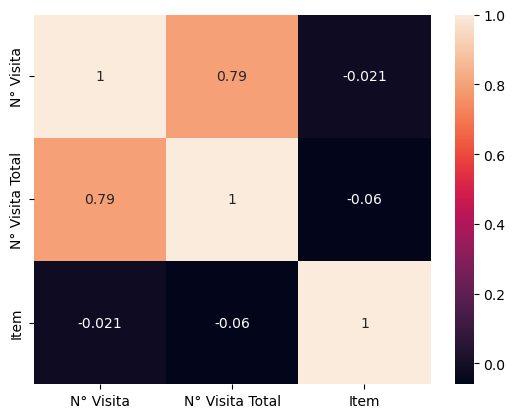

In [22]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)


In [23]:
df['Municipio'] = df['Municipio'].str.lower().str.strip()  # Ejemplo para limpiar texto


In [24]:
px.box(df,y='Item')